## Modules

In [1]:
# KNN Modules
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc

# Logistic Regression Modules
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier

## Explore

In [5]:
df = pd.read_excel("../data/data_22092023.xlsx")

In [6]:
df = df[['HASTA_NO', 'Cinsiyet', 'Yaş', 'BMI',
       'Sigara kullanımı', 'Antiagregan', 
       'NLR', 'Başvuru', 'VİRADS', 'Tm boyutu mm',
       'Tm Sayı', 'Karakteri', 'Yerleşim', 'Mesane boynu tutulumu',
       'Ek sistoskopi bulgu', 'Patoloji', 'Kas var mı', 'Nüks']]

In [ ]:
unused_cols = {
    'Obturator': 'Involvement of the obturator region (if applicable)',
    "Ek hastalık": "Presence of additional diseases or comorbidities.",
    'TİT': 'Troponin-I level, a marker of heart muscle damage',
    'Sigara devamı': 'Duration of smoking (if applicable)',
    "NEU": "Neutrophil count.",
    "LYMP": "Lymphocyte count."
}

---

### KNN

In [132]:
# Select features (X) and target variable (y)
X = df.drop(columns=['Nüks'])
y = df['Nüks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier (you can experiment with different values of K)
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)


# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification Report
#classification_rep = classification_report(y_test, y_pred)

# Calculate AUC value
y_prob = knn_classifier.predict_proba(X_test)[:, 1]
auc_value = roc_auc_score(y_test, y_prob)

# Calculate True Positives, False Positives, True Negatives, and False Negatives
tn, fp, fn, tp = confusion.ravel()

# Calculate Sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)

# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp)


print("KNN\n")
# Print Accuracy
print("Accuracy: ", accuracy)
# Print Sensitivity and Specificity
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

# Print the AUC value
print("AUC Value:", auc_value)

# Compute ROC curve and ROC AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

KNN

Accuracy:  0.8260869565217391
Sensitivity:  0.7142857142857143
Specificity:  0.875
AUC Value: 0.7410714285714286


In [ ]:
k = 2
test = 0.2
rs = "3-14"

---

### Logistic Regression

In [133]:
# Select features (X) and target variable (y)
X = df.drop(columns=['Nüks'])
y = df['Nüks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Feature scaling (optional but can be beneficial for logistic regression)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Train the logistic regression model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC value
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]
auc_value = roc_auc_score(y_test, y_prob)

# Calculate True Positives, False Positives, True Negatives, and False Negatives
tn, fp, fn, tp = confusion.ravel()

# Calculate Sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)

# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp)


print("Logistic Regression\n")
# Print Accuracy
print("Accuracy: ", accuracy)
# Print Sensitivity and Specificity
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

# Print the AUC value
print("AUC Value:", auc_value)

# Drawing Section for AUC Curve
fpr_decision, tpr_decision, thresholds_decision = roc_curve(y_test, y_prob)
roc_auc_decision = auc(fpr_decision, tpr_decision)

Logistic Regression

Accuracy:  0.8260869565217391
Sensitivity:  0.7
Specificity:  0.9230769230769231
AUC Value: 0.8692307692307693


/Users/ahmetkasimerbay/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
test = 0.2
rs = "62-72"

---

### Random Forest

In [84]:
# Select features (X) and target variable (y)
X = df.drop(columns=['Nüks'])
y = df['Nüks']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=3)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate AUC value
y_prob = random_forest_model.predict_proba(X_test)[:, 1]
auc_value = roc_auc_score(y_test, y_prob)

# Calculate True Positives, False Positives, True Negatives, and False Negatives
tn, fp, fn, tp = confusion.ravel()

# Calculate Sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)

# Calculate Specificity (True Negative Rate)
specificity = tn / (tn + fp)


print("Random Forest\n")
# Print Accuracy
print("Accuracy: ", accuracy)
# Print Sensitivity and Specificity
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

# Print the AUC value
print("AUC Value:", auc_value)


# Compute ROC curve and ROC AUC
fpr_random, tpr_random, thresholds = roc_curve(y_test, y_prob)
roc_auc_random = auc(fpr_random, tpr_random)

Random Forest

Accuracy:  0.7391304347826086
Sensitivity:  0.75
Specificity:  0.7333333333333333
AUC Value: 0.75


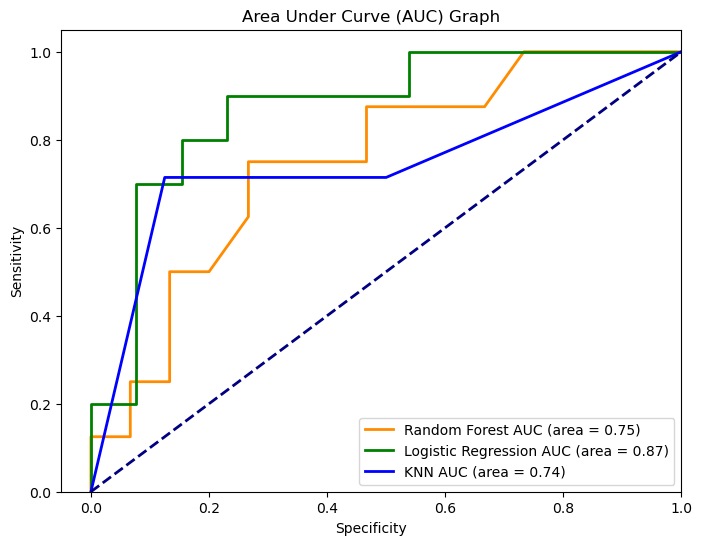

In [134]:
# Plot ROC curve
plt.figure(figsize=(8, 6))

plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='Random Forest AUC (area = %0.2f)' % roc_auc_random)
plt.plot(fpr_decision, tpr_decision, color='green', lw=2, label='Logistic Regression AUC (area = %0.2f)' % roc_auc_decision)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN AUC (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('Area Under Curve (AUC) Graph')
plt.legend(loc='lower right')
plt.show()

In [ ]:
!python --version

"We utilized Python version 3.10.9 as our programming language and Scikit-learn version 1.3 to train, assess, and validate machine learning models. Our analysis involved the utilization of three distinct machine learning algorithms: Random Forest, K-Nearest Neighbors, and Logistic Regression.

The Random Forest algorithm, rooted in ensemble learning, operates based on the principles of decision trees. It employs multiple decision trees, each trained on a different subset of features, to provide predictions. The final prediction is determined through a majority vote from these individual classifiers.

K-Nearest Neighbors, on the other hand, identifies the nearest neighbors of each sample and assigns a class label based on the classes of these neighboring samples. This algorithm is particularly suited for classification tasks.

Logistic Regression, meanwhile, is a model used for estimating probabilities in binary classification problems. It is a variation of linear regression tailored for classification. Logistic regression employs the sigmoid function to assign class labels to samples.

Our dataset was partitioned into two main segments: a development set comprising 146 samples and a separate test set with 37 samples. Instead of further subdividing the development set into training and validation subsets, we opted for a ten-fold cross-validation approach. This method involved assessing the accuracy of each model's probability output during cross-validation and then computing the average of these outputs to obtain the final prediction."

In [ ]:
len(X_train)